<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/LogisticRegression/%D0%9B%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F_(%D0%B1%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Логистическая регрессия (бинарная классификация)

## 1. Введение

Логистическая регрессия представляет собой параметрический метод машинного обучения, предназначенный для решения задач бинарной классификации. Данный подход позволяет моделировать вероятность принадлежности объекта к одному из двух возможных классов на основе заданного набора признаков.

### Обозначения и постановка задачи

Пусть задано множество объектов, каждый из которых описывается $n$-мерным вектором признаков:
$$
\mathbf{x} = (x_1, x_2, \dots, x_n)^T \in \mathbb{R}^n,
$$
где $n$ — количество информативных признаков, характеризующих объект.

Целевая переменная $y$ принимает значения из множества $\{0, 1\}$, где:
- $y = 1$ обозначает принадлежность объекта к положительному (целевому) классу;
- $y = 0$ соответствует отрицательному классу.

Задача заключается в построении функции, которая для заданного входного вектора $\mathbf{x}$ возвращает оценку условной вероятности принадлежности объекта к положительному классу:
$$
p(\mathbf{x}) = P(y=1 \mid \mathbf{x}).
$$

Соответственно, вероятность принадлежности объекта к отрицательному классу выражается как:
$$
P(y=0 \mid \mathbf{x}) = 1 - P(y=1 \mid \mathbf{x}) = 1 - p(\mathbf{x}).
$$

Таким образом, модель позволяет не только предсказывать класс объекта, но и оценивать уверенность в этом предсказании через вероятностную интерпретацию.


### Модель логистической регрессии

Для оценки указанной вероятности используется следующая модель:
$$
p(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b),
$$
где:
- $\mathbf{w} = (w_1, w_2, \dots, w_n)^T \in \mathbb{R}^n$ — вектор весовых коэффициентов (параметров модели);
- $b \in \mathbb{R}$ — свободный член (bias), обеспечивающий сдвиг гиперплоскости;
- $\sigma(z)$ — сигмоидная функция, определяемая как:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}.
$$

Величина $z = \mathbf{w}^T \mathbf{x} + b$ называется **логитом** (по позже рассмотрим его по подробнее) и представляет собой нелинейно преобразованный линейный прогноз модели. Применение сигмоиды обеспечивает отображение вещественного числа $z \in \mathbb{R}$ в интервал $(0, 1)$, что делает возможной интерпретацию выхода модели как вероятности.

### Предсказание класса

На основе полученной вероятности $p(\mathbf{x})$ осуществляется предсказание класса $\hat{y} \in \{0, 1\}$, обычно по пороговой функции:
$$
\hat{y} =
\begin{cases}
1, & \text{если } p(\mathbf{x}) \geq 0.5 \\
0, & \text{иначе}.
\end{cases}
$$

Таким образом:
- $y$ — истинное значение целевой переменной;
- $p(\mathbf{x})$ — модельная оценка вероятности принадлежности к классу $1$;
- $\hat{y}$ — предсказанное значение класса;
- $z$ — линейная комбинация признаков, используемая для вычисления $p(\mathbf{x})$.


## 2. Вероятностная интерпретация модели

В отличие от обычной линейной регрессии, выход которой может принимать любые вещественные значения, **логистическая регрессия** предназначена для решения задач **бинарной классификации** и выдает на выходе **вероятность принадлежности объекта к одному из классов**, что делает её вывод интерпретируемым и полезным в практике.

Для описания этой вероятности предполагается, что при заданном входном векторе $\mathbf{x}$ целевая переменная $y$ подчиняется **распределению Бернулли**, поскольку возможны лишь два исхода: $y = 1$ или $y = 0$. Тогда вероятность можно записать следующим образом:

$$
P(y \mid \mathbf{x}) =
\begin{cases}
p(\mathbf{x}), & \text{если } y = 1, \\
1 - p(\mathbf{x}), & \text{если } y = 0.
\end{cases}
$$

Здесь $p(\mathbf{x})$ — это вероятность того, что объект с признаками $\mathbf{x}$ принадлежит к положительному классу ($y=1$). Эта вероятность моделируется с помощью **сигмоидной функции**, зависящей от параметров модели:

$$
p(\mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b),
$$

где $\sigma(z) = \frac{1}{1 + e^{-z}}$, а $\mathbf{w}$ и $b$ — параметры модели (веса и смещение).

Это выражение можно переписать в более компактной и универсальной форме:

$$
P(y \mid \mathbf{x}; \mathbf{w}, b) = \left( \sigma(\mathbf{w}^T \mathbf{x} + b) \right)^y \cdot \left(1 - \sigma(\mathbf{w}^T \mathbf{x} + b)\right)^{1 - y}.
$$

Такая форма удобна тем, что объединяет оба случая — $y=1$ и $y=0$ — в одно выражение. При подстановке конкретного значения $y$ один из множителей становится равным единице, и остаётся только вероятность соответствующего класса:
- если $y=1$, то формула возвращает $p(\mathbf{x})$,
- если $y=0$, то — $1 - p(\mathbf{x})$.

Это представление особенно ценно при построении **функции правдоподобия**, которая используется для оценки неизвестных параметров модели методом **максимального правдоподобия**. Логарифмирование этой функции приводит к стандартной **функции потерь логистической регрессии**, которую можно эффективно минимизировать градиентными методами.

Таким образом, вероятностная интерпретация модели позволяет не только строго математически обосновать выбор функции потерь, но и получить интерпретируемый результат — оценку вероятности принадлежности к каждому из классов.

## 3. Логит-преобразование и его связь с сигмоидой

Одним из ключевых понятий в логистической регрессии является **логит-преобразование** (или **логарифм шансов**), определяемое как:

$$
\text{logit}(p) = \ln\left( \frac{p}{1 - p} \right), \quad p \in (0, 1).
$$

Функция $\text{logit}(p)$ отображает вероятность $p$ на всю область вещественных чисел $\mathbb{R}$, что позволяет использовать линейные методы моделирования.

Существует взаимно однозначное соответствие между логитом и сигмоидой. Если положить $p = \sigma(z)$, то можно показать, что:

$$
z = \text{logit}(p).
$$

**Доказательство:**

Пусть $p = \sigma(z) = \dfrac{1}{1 + e^{-z}}$. Тогда:

$$
\begin{align*}
p &= \frac{1}{1 + e^{-z}} \\
\Rightarrow 1 + e^{-z} &= \frac{1}{p} \\
\Rightarrow e^{-z} &= \frac{1 - p}{p} \\
\Rightarrow -z &= \ln\left( \frac{1 - p}{p} \right) \\
\Rightarrow z &= \ln\left( \frac{p}{1 - p} \right) = \text{logit}(p).
\end{align*}
$$

Таким образом, сигмоида и логит являются обратными друг к другу функциями:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad \text{logit}(p) = \ln\left( \frac{p}{1 - p} \right), \quad \text{причём } \sigma(\text{logit}(p)) = p, \; \text{logit}(\sigma(z)) = z.
$$

## 4. Линейная зависимость в пространстве логитов

Логистическая регрессия предполагает, что логит вероятности принадлежности к положительному классу линейно зависит от входных признаков:

$$
\text{logit}\left(P(y=1 \mid \mathbf{x})\right) = \mathbf{w}^T \mathbf{x} + b.
$$

Применяя обратное преобразование (сигмоиду), получаем:

$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b).
$$

Таким образом, модель устанавливает **линейную зависимость в пространстве логитов**, а сигмоида обеспечивает корректную интерпретацию результата как вероятности.

## 5. Пример преобразования

Рассмотрим конкретный пример. Пусть модель предсказывает вероятность $p = 0.8$. Вычислим соответствующее значение логита:

$$
\text{logit}(0.8) = \ln\left( \frac{0.8}{1 - 0.8} \right) = \ln\left( \frac{0.8}{0.2} \right) = \ln(4) \approx 1.386.
$$

Обратное преобразование:

$$
\sigma(1.386) = \frac{1}{1 + e^{-1.386}} \approx 0.8.
$$

Этот пример демонстрирует, как происходит переход между вероятностным и линейным представлениями в логистической регрессии.

## 6. Сводка основных функций

| Функция      | Обозначение          | Область определения         | Область значений     | Свойства |
|--------------|----------------------|-----------------------------|-----------------------|----------|
| **Сигмоида** | $\sigma(z)$        | $z \in \mathbb{R}$         | $\sigma(z) \in (0, 1)$ | $\sigma(\text{logit}(p)) = p$ |
| **Логит**    | $\text{logit}(p)$  | $p \in (0, 1)$             | $\text{logit}(p) \in \mathbb{R}$ | $\text{logit}(\sigma(z)) = z$ |


# Сигмоидная функция: определение, свойства и производная



## 1. Определение сигмоидной функции

**Сигмоидная функция** (или **логистическая функция**) — это математическая функция вида:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad z \in \mathbb{R}.
$$

Она преобразует любое вещественное число $z$ в интервал $(0, 1)$, что делает её удобной для моделирования вероятностей.



## 2. График сигмоиды

Функция имеет характерную **S-образную форму**:
- При $z \to +\infty$, $\sigma(z) \to 1$,
- При $z \to -\infty$, $\sigma(z) \to 0$,
- В точке $z = 0$: $\sigma(0) = \frac{1}{1 + 1} = 0.5$.



## 3. Основные свойства сигмоидной функции

| Свойство | Описание |
|---------|----------|
| **Область определения** | Все вещественные числа: $z \in \mathbb{R}$ |
| **Область значений** | Интервал $(0, 1)$ |
| **Непрерывность** | Функция непрерывна на всей области определения |
| **Монотонность** | Строго возрастает |
| **Дифференцируемость** | Бесконечно дифференцируема |
| **Симметричность относительно точки (0, 0.5)** | $\sigma(-z) = 1 - \sigma(z)$ |



## 4. Производная сигмоидной функции

Сигмоида обладает важным свойством: её производная выражается через саму себя.

### Формула производной:

$$
\sigma'(z) = \sigma(z)(1 - \sigma(z))
$$

### Вывод производной:

$$
\begin{align*}
\sigma(z) &= \frac{1}{1 + e^{-z}} \\
\Rightarrow \sigma'(z) &= \frac{d}{dz} \left( \frac{1}{1 + e^{-z}} \right) \\
&= \frac{e^{-z}}{(1 + e^{-z})^2} \\
&= \frac{1}{1 + e^{-z}} \cdot \left(1 - \frac{1}{1 + e^{-z}}\right) \\
&= \sigma(z)(1 - \sigma(z)).
\end{align*}
$$

Это свойство делает сигмоиду удобной для использования в градиентных методах оптимизации, например, при обучении логистической регрессии или нейронных сетей.



## 5. Применение сигмоидной функции

Сигмоида широко используется в машинном обучении:
- **Логистическая регрессия**: для моделирования вероятности принадлежности к классу.
- **Нейронные сети**: как функция активации (хотя сейчас часто заменяется ReLU и его аналогами).
- **Бинарная классификация**: отображает выход модели в интервал [0, 1], что можно интерпретировать как вероятность.


## 6. Преимущества и недостатки


| Плюсы                                 | Минусы                                      |
|--------------------------------------|---------------------------------------------|
| Выход в интервале (0, 1) — удобно для вероятностей | Проблема затухающих градиентов при больших |z| |
| Непрерывная и дифференцируемая       | Не симметрична относительно нуля (в отличие от tanh) |
| Легко вычисляется и дифференцируется | Может приводить к исчезновению градиентов в глубоких сетях |



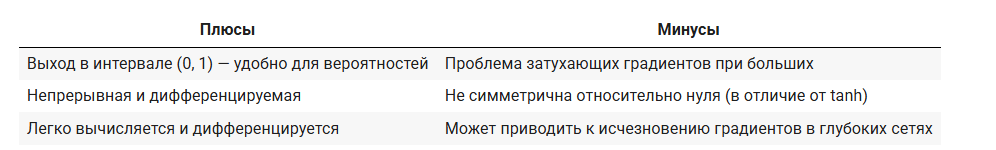



## 7. Альтернативы сигмоиде

В современных задачах сигмоида часто заменяется другими функциями активации, такими как:
- **ReLU**: $f(z) = \max(0, z)$,
- **tanh**: $\tanh(z) = 2\sigma(2z) - 1$,
- **Softmax**: для многоклассовой классификации.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определим сигмоидную функцию и её производную
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)

# Создаём массив значений z
z = np.linspace(-10, 10, 400)

# Вычисляем значения сигмоиды и её производной
y = sigmoid(z)
dy = sigmoid_derivative(z)

# Строим график
plt.figure(figsize=(10, 6))
plt.plot(z, y, label='σ(z) — сигмоида', color='blue')
plt.plot(z, dy, label="σ'(z) — производная", color='red', linestyle='--')

# Оформление графика
plt.title('Сигмоидная функция и её производная')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Показываем график
plt.show()


## 3. Метод максимального правдоподобия (MLE)

Пусть у нас имеется обучающая выборка из $ n $ независимых наблюдений:

$$
D = \{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^n,
$$

где $ \mathbf{x}^{(i)} \in \mathbb{R}^d $ — вектор признаков объекта $ i $, а $ y^{(i)} \in \{0, 1\} $ — соответствующая метка класса.

Цель модели — оценить вероятность принадлежности объекта к положительному классу:

$$
p(\mathbf{x}^{(i)}) = P(y^{(i)} = 1 \mid \mathbf{x}^{(i)}; \mathbf{w}, b) = \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b),
$$

где $ \sigma(z) = \frac{1}{1 + e^{-z}} $ — сигмоидная функция, а $ \mathbf{w}, b $ — параметры модели.

### Функция правдоподобия

Поскольку задача является бинарной классификацией, вероятностное распределение целевой переменной задаётся как **распределение Бернулли**:

$$
P(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{w}, b) =
\begin{cases}
p(\mathbf{x}^{(i)}), & \text{если } y^{(i)} = 1, \\
1 - p(\mathbf{x}^{(i)}), & \text{если } y^{(i)} = 0.
\end{cases}
$$

Это выражение можно записать компактно:

$$
P(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{w}, b) = \left( \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)^{y^{(i)}} \cdot \left(1 - \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)\right)^{1 - y^{(i)}}.
$$

Функция правдоподобия всей выборки с учетом предположения о независимости и одинаковой распределённости (i.i.d.) наблюдений:

$$
L(\mathbf{w}, b) = \prod_{i=1}^{n} P(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{w}, b).
$$

Подставляя формулу выше:

$$
L(\mathbf{w}, b) = \prod_{i=1}^{n} \left[ \left( \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)^{y^{(i)}} \cdot \left(1 - \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)\right)^{1 - y^{(i)}} \right].
$$

### Логарифмическая функция правдоподобия

Для удобства оптимизации перейдём к **логарифму функции правдоподобия**:

$$
\ell(\mathbf{w}, b) = \log L(\mathbf{w}, b) = \sum_{i=1}^{n} \log \left[ \left( \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)^{y^{(i)}} \cdot \left(1 - \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)\right)^{1 - y^{(i)}} \right].
$$

Используем свойства логарифма:

$$
\ell(\mathbf{w}, b) = \sum_{i=1}^{n} \left[ y^{(i)} \log \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) + (1 - y^{(i)}) \log \left(1 - \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)\right) \right].
$$

Эта функция называется **логарифмом правдоподобия** (log-likelihood), и её максимизация позволяет найти наилучшие значения параметров $\mathbf{w}, b$, которые лучше всего объясняют данные.


### Оптимизация

Максимизация логарифма правдоподобия $\ell(\mathbf{w}, b)$ означает нахождение таких параметров модели $\mathbf{w}$ и $b$, которые делают обучающие данные максимально вероятными при заданной гипотезе модели. Формально задача выглядит так:

$$
\max_{\mathbf{w}, b} \ell(\mathbf{w}, b).
$$

Однако большинство численных методов оптимизации, таких как **градиентный спуск**, изначально предназначены для **минимизации функций**. Чтобы воспользоваться этими алгоритмами, мы переходим к эквивалентной задаче: **минимизации отрицательного значения логарифма правдоподобия**.

#### Почему это можно сделать?

Заметим следующее: если одно число больше другого, то его отрицательное значение будет меньше. То есть, если

$$
\ell(\mathbf{w}_1, b_1) > \ell(\mathbf{w}_2, b_2),
$$

то автоматически выполняется:

$$
-\ell(\mathbf{w}_1, b_1) < -\ell(\mathbf{w}_2, b_2).
$$

Это свойство позволяет нам утверждать, что **точка, в которой $\ell(\mathbf{w}, b)$ достигает максимума, совпадает с точкой, в которой $-\ell(\mathbf{w}, b)$ достигает минимума**.

Таким образом, задачи:

- $\displaystyle \max_{\mathbf{w}, b} \ell(\mathbf{w}, b)$
- и $\displaystyle \min_{\mathbf{w}, b} \left(-\ell(\mathbf{w}, b)\right)$

— **математически эквивалентны**.



#### Функция потерь (бинарная кросс-энтропия)

Поэтому мы можем ввести новую функцию — **функцию потерь**, равную отрицательному значению логарифма правдоподобия:

$$
J(\mathbf{w}, b) = -\ell(\mathbf{w}, b) = -\sum_{i=1}^{n} \left[ y^{(i)} \log \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) + (1 - y^{(i)}) \log \left(1 - \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b)\right) \right].
$$

Эта функция называется **бинарной кросс-энтропией** или **логистической функцией потерь**.

Её минимизация позволяет найти такие значения параметров $\mathbf{w}, b$, при которых модель наиболее точно предсказывает метки классов на обучающей выборке.



#### Важное свойство: выпуклость

Одним из ключевых преимуществ этой функции потерь является её **выпуклость относительно параметров $\mathbf{w}$ и $b$** (при фиксированных значениях $\mathbf{x}^{(i)}$).

##### Что такое выпуклая функция?

Функция называется **выпуклой**, если для любых двух точек $\mathbf{w}_1, b_1$ и $\mathbf{w}_2, b_2$ из области определения и любого числа $\lambda \in [0, 1]$ выполняется неравенство:

$$
J(\lambda (\mathbf{w}_1, b_1) + (1 - \lambda)(\mathbf{w}_2, b_2)) \leq \lambda J(\mathbf{w}_1, b_1) + (1 - \lambda) J(\mathbf{w}_2, b_2).
$$

Графически это означает, что график функции "не проваливается" ниже соединяющего отрезка между двумя точками.

##### Почему это важно?

Выпуклость гарантирует:
- Существование **единственного глобального минимума**,
- Отсутствие "проблемных" локальных минимумов,
- Быструю и стабильную сходимость градиентных методов.

В случае логистической регрессии **бинарная кросс-энтропия является выпуклой функцией**, что делает её идеальной целевой функцией для оптимизации.



### ✅ Итог

- Максимизация $\ell(\mathbf{w}, b)$ эквивалентна минимизации $-\ell(\mathbf{w}, b)$, потому что при изменении знака порядок значений инвертируется, и максимум превращается в минимум.
- Полученная функция $J(\mathbf{w}, b)$ называется **бинарной кросс-энтропией** и используется как **функция потерь** в логистической регрессии.
- Эта функция является **выпуклой**, что обеспечивает хорошие свойства сходимости при использовании численных методов оптимизации, таких как градиентный спуск.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция правдоподобия (log-likelihood)
def log_likelihood(X, y, w, b):
    z = X * w + b
    log_lik = np.sum(y * np.log(sigmoid(z) + 1e-15) + (1 - y) * np.log(1 - sigmoid(z) + 1e-15))
    return log_lik

# Функция потерь — бинарная кросс-энтропия
def binary_cross_entropy(X, y, w, b):
    return -log_likelihood(X, y, w, b)

# Генерация синтетических данных
np.random.seed(42)
X = np.linspace(-3, 3, 10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 0, 1, 1, 1, 1])

# Обучение модели для сравнения оптимального веса
model = LogisticRegression()
model.fit(X, y)
optimal_w = model.coef_[0][0]
optimal_b = model.intercept_[0]

# Варьируем параметр w, фиксируем b = 0
w_values = np.linspace(-5, 5, 400)
l_values = []
j_values = []

for w in w_values:
    l = log_likelihood(X.flatten(), y, w, b=0)
    j = binary_cross_entropy(X.flatten(), y, w, b=0)
    l_values.append(l)
    j_values.append(j)

# Визуализация
plt.figure(figsize=(12, 5))

# Левый график: log-likelihood
plt.subplot(1, 2, 1)
plt.plot(w_values, l_values, label=r'$\ell(w, b=0)$')
plt.axvline(optimal_w, color='r', linestyle='--', label='Оптимальный w (sklearn)')
plt.title('Логарифм правдоподобия $\ell(w, b=0)$')
plt.xlabel('Вес w')
plt.ylabel(r'$\ell(w)$')
plt.grid(True)
plt.legend()

# Правый график: бинарная кросс-энтропия
plt.subplot(1, 2, 2)
plt.plot(w_values, j_values, label=r'$J(w, b=0)$')
plt.axvline(optimal_w, color='r', linestyle='--', label='Оптимальный w (sklearn)')
plt.title('Бинарная кросс-энтропия $J(w, b=0)$')
plt.xlabel('Вес w')
plt.ylabel(r'$J(w)$')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#4 Градиентный спуск в логистической регрессии

## 4.1. Функция потерь (бинарная кросс-энтропия)

Как было показано ранее, функция потерь для модели бинарной логистической регрессии определяется как **бинарная кросс-энтропия**:

$$
J(\mathbf{w}, b) = -\sum_{i=1}^{n} \left[ y^{(i)} \log \sigma(z^{(i)}) + (1 - y^{(i)}) \log (1 - \sigma(z^{(i)})) \right],
$$

где:
- $ z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b $ — линейный выход модели перед применением сигмоиды,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ — сигмоидная функция.

Целью обучения модели является минимизация этой функции потерь по параметрам модели $\mathbf{w}$ и $b$. Для этого используется метод градиентного спуска, требующий вычисления **градиента функции потерь**:

$$
\nabla J(\mathbf{w}, b) = \left( \frac{\partial J}{\partial w_1}, \dots, \frac{\partial J}{\partial w_d}, \frac{\partial J}{\partial b} \right)^T.
$$



## 4.2. Вспомогательные формулы

### 4.2.1. Производная сигмоидной функции

Для последующего дифференцирования функции потерь понадобится выражение для производной сигмоидной функции:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}, \quad \text{тогда}
$$
$$
\frac{d\sigma}{dz} = \sigma(z)(1 - \sigma(z)).
$$

Это свойство будет использоваться при нахождении частных производных функции потерь по параметрам модели.



## 4.3. Дифференцирование функции потерь

Рассмотрим отдельное слагаемое в сумме функции потерь:

$$
J_i = - \left[ y^{(i)} \log \sigma(z^{(i)}) + (1 - y^{(i)}) \log (1 - \sigma(z^{(i)})) \right].
$$

Вычислим его производную по $z^{(i)}$, используя цепное правило дифференцирования:

$$
\frac{\partial J_i}{\partial z^{(i)}} =
- \left[ \frac{y^{(i)}}{\sigma(z^{(i)})} \cdot \frac{d\sigma}{dz^{(i)}} + \frac{(1 - y^{(i)}) \cdot (-1)}{1 - \sigma(z^{(i)})} \cdot \frac{d\sigma}{dz^{(i)}} \right]
$$

Подставим выражение для производной сигмоиды:

$$
\frac{d\sigma}{dz^{(i)}} = \sigma(z^{(i)})(1 - \sigma(z^{(i)})),
$$

получаем:
$$
\frac{\partial J_i}{\partial z^{(i)}} =
- \left[ \frac{y^{(i)}}{\sigma(z^{(i)})} \cdot \sigma(z^{(i)})(1 - \sigma(z^{(i)})) - \frac{(1 - y^{(i)})}{1 - \sigma(z^{(i)})} \cdot \sigma(z^{(i)})(1 - \sigma(z^{(i)})) \right]
$$

Упрощаем:
$$
\frac{\partial J_i}{\partial z^{(i)}} = - \left[ y^{(i)}(1 - \sigma(z^{(i)})) - (1 - y^{(i)})\sigma(z^{(i)}) \right] = \sigma(z^{(i)}) - y^{(i)}.
$$

Таким образом, производная одного слагаемого по $z^{(i)}$ равна:
$$
\frac{\partial J_i}{\partial z^{(i)}} = \hat{y}^{(i)} - y^{(i)},
$$
где $\hat{y}^{(i)} = \sigma(z^{(i)})$ — предсказанная моделью вероятность принадлежности объекта к положительному классу.



## 4.4. Частные производные функции потерь по параметрам модели

Применим цепное правило для вычисления частных производных функции потерь по каждому из параметров модели:

$$
\frac{\partial J}{\partial w_j} = \sum_{i=1}^{n} \frac{\partial J_i}{\partial z^{(i)}} \cdot \frac{\partial z^{(i)}}{\partial w_j}, \quad
\frac{\partial J}{\partial b} = \sum_{i=1}^{n} \frac{\partial J_i}{\partial z^{(i)}} \cdot \frac{\partial z^{(i)}}{\partial b}.
$$

Заметим, что:
$$
z^{(i)} = \mathbf{w}^T \mathbf{x}^{(i)} + b = \sum_{j=1}^{d} w_j x_j^{(i)} + b.
$$

Следовательно:
$$
\frac{\partial z^{(i)}}{\partial w_j} = x_j^{(i)}, \quad
\frac{\partial z^{(i)}}{\partial b} = 1.
$$

Подставляем:
$$
\frac{\partial J}{\partial w_j} = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}, \quad
\frac{\partial J}{\partial b} = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}).
$$



## 4.5. Градиент функции потерь

Объединяя все компоненты, получаем выражение для градиента функции потерь:

$$
\nabla_{\mathbf{w}, b} J(\mathbf{w}, b) =
\begin{bmatrix}
\displaystyle \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_1^{(i)} \\
\vdots \\
\displaystyle \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_d^{(i)} \\
\displaystyle \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})
\end{bmatrix}
= \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) \cdot
\begin{bmatrix}
x_1^{(i)} \\
\vdots \\
x_d^{(i)} \\
1
\end{bmatrix}.
$$

Можно также записать в более компактном виде, если объединить веса и свободный член $b$ в единый вектор:
$$
\tilde{\mathbf{w}} = \begin{bmatrix} \mathbf{w} \\ b \end{bmatrix}, \quad
\tilde{\mathbf{x}}^{(i)} = \begin{bmatrix} \mathbf{x}^{(i)} \\ 1 \end{bmatrix},
$$
тогда:
$$
\nabla_{\tilde{\mathbf{w}}} J(\tilde{\mathbf{w}}) = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) \cdot \tilde{\mathbf{x}}^{(i)}.
$$



## 4.6. Алгоритм обновления параметров (градиентный спуск)

На каждом шаге итерационного процесса параметры модели обновляются следующим образом:

$$
\tilde{\mathbf{w}} := \tilde{\mathbf{w}} - \alpha \cdot \nabla_{\tilde{\mathbf{w}}} J(\tilde{\mathbf{w}}),
$$
или покомпонентно:
$$
w_j := w_j - \alpha \cdot \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}, \quad j = 1, \dots, d,
$$
$$
b := b - \alpha \cdot \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}),
$$
где $\alpha > 0$ — положительное число, называемое **скоростью обучения** или **шагом градиентного спуска**.

Процесс повторяется до достижения заданной точности или максимального числа итераций.


## ✅ 4.7. Реализация на Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь: бинарная кросс-энтропия
def compute_loss(y, y_pred):
    epsilon = 1e-15  # чтобы избежать log(0)
    loss = -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))
    return loss

# Градиентный спуск
def logistic_regression(X, y, lr=0.01, n_iters=1000):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    losses = []

    for i in range(n_iters):
        # Линейный вывод модели
        linear_model = np.dot(X, weights) + bias
        # Применяем сигмоиду — получаем вероятности классов
        y_pred = sigmoid(linear_model)

        # Вычисляем градиенты
        dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
        db = (1 / n_samples) * np.sum(y_pred - y)

        # Обновляем параметры
        weights -= lr * dw
        bias -= lr * db

        # Вычисляем и сохраняем ошибку
        loss = compute_loss(y, y_pred)
        losses.append(loss)

        if i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss:.4f}")

    return weights, bias, losses

# Визуализация разделяющей границы и графика потерь
def plot_decision_boundary(X, y, weights, bias):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = sigmoid(np.dot(grid, weights) + bias)
    preds = (probs >= 0.5).astype(int)
    Z = preds.reshape(xx.shape)

    plt.figure(figsize=(12, 5))

    # Разделяющая граница
    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
    plt.title("Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

    # Изменение потерь
    plt.subplot(1, 2, 2)
    plt.plot(losses, color='green')
    plt.title("Loss Over Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")

    plt.tight_layout()
    plt.show()

# Генерация синтетических данных
X, y = make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Нормализация

# Запуск градиентного спуска
weights, bias, losses = logistic_regression(X, y, lr=0.1, n_iters=1000)

# Визуализация
plot_decision_boundary(X, y, weights, bias)

### ✅5. Формулы метрик качества бинарной классификации (научное изложение)

Для оценки эффективности моделей бинарной классификации применяются стандартные метрики, основанные на анализе четырёх исходов предсказаний:

- **TP (True Positive)** — истинно положительные случаи,
- **TN (True Negative)** — истинно отрицательные случаи,
- **FP (False Positive)** — ложноположительные случаи,
- **FN (False Negative)** — ложноотрицательные случаи.

Ниже приведены формальные математические выражения наиболее распространённых метрик.



#### 5.1. **Accuracy (Точность классификации)**  
Accuracy определяется как доля правильно классифицированных образцов (положительных и отрицательных) среди общего числа образцов:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Эта метрика предоставляет обобщённое представление о качестве модели, однако её информативность снижается в случае несбалансированных классов.



#### 5.2. **Precision (Точность предсказания положительного класса)**  
Precision характеризует долю действительно положительных объектов среди всех объектов, классифицированных моделью как положительные:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Метрика отражает надёжность модели при выявлении положительного класса: чем выше значение Precision, тем реже модель ошибается, предсказывая положительный класс.



#### 5.3. **Recall (Полнота выявления положительного класса)**  
Recall определяет долю верно распознанных положительных объектов среди всех реальных положительных примеров:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Recall описывает способность модели находить все положительные образцы. Высокое значение Recall указывает на низкий уровень пропусков положительных случаев.



#### 5.4. **F1-score (F-мера)**  
F1-score представляет собой гармоническое среднее между Precision и Recall, что позволяет учитывать оба аспекта одновременно:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Данная метрика особенно актуальна в задачах с несбалансированными данными, где необходимо соблюдать компромисс между точностью и полнотой.



### 📌 Сравнение метрик

| Метрика     | Формула                                                                 | Интерпретация                                                |
|-------------|--------------------------------------------------------------------------|---------------------------------------------------------------|
| Accuracy    | $\dfrac{TP + TN}{TP + TN + FP + FN}$                                    | Общая доля корректных предсказаний                            |
| Precision   | $\dfrac{TP}{TP + FP}$                                                   | Доля правильных положительных предсказаний                    |
| Recall      | $\dfrac{TP}{TP + FN}$                                                   | Доля найденных реальных положительных объектов                |
| F1-score    | $2 \cdot \dfrac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | Комбинированная мера, учитывающая Precision и Recall          |



# Прикладное применение логистической регрессии в задаче классификации спама: с использованием метрик качества и ROC-AUC



В данном разделе  представлено прикладное применение метода **логистической регрессии** к задаче бинарной классификации — **определению принадлежности текстовых сообщений к категории "спам" или "не спам"**. Для демонстрации процесса обучения модели, оценки её эффективности и анализа предсказательных способностей используется небольшой искусственный датасет, состоящий из шести примеров. Каждый объект описывается тремя бинарными признаками, а целевая переменная принимает значения $ y \in \{0, 1\} $.

Кроме того, рассмотрены стандартные метрики качества бинарной классификации (Accuracy, Precision, Recall, F1-score), а также построена **ROC-кривая** и вычислено значение **AUC (Area Under the Curve)** как обобщённая мера способности модели различать положительные и отрицательные классы на всём диапазоне порогов принятия решений.



## 2. Описание датасета

Рассматривается следующий набор данных:

| № | x₁: наличие слова "купить" | x₂: восклицательный знак | x₃: длина > 20 символов | y: класс (0 - не спам, 1 - спам) |
|---|----------------------------|---------------------------|--------------------------|----------------------------------|
| 1 |             1              |             1             |            1             |                1                 |
| 2 |             0              |             0             |            0             |                0                 |
| 3 |             1              |             0             |            1             |                0                 |
| 4 |             0              |             1             |            0             |                1                 |
| 5 |             1              |             1             |            0             |                1                 |
| 6 |             0              |             0             |            1             |                0                 |

Обозначим:
- $\mathbf{x}^{(i)} = (x_1^{(i)}, x_2^{(i)}, x_3^{(i)})^T$ — вектор признаков для $i$-го сообщения,
- $y^{(i)} \in \{0, 1\}$ — истинный класс сообщения,
- $\hat{y}^{(i)} \in (0, 1)$ — вероятность принадлежности к положительному классу, вычисленная моделью.


## 3. Формализация модели

Логистическая регрессия представляет собой обобщённую линейную модель, в которой вероятность принадлежности объекта к положительному классу определяется через сигмоидную функцию:
$$
P(y=1 \mid \mathbf{x}) = \sigma(\mathbf{w}^T \mathbf{x} + b),
$$
где:
- $\mathbf{w} = (w_1, w_2, w_3)^T$ — вектор весовых коэффициентов,
- $b$ — свободный член (bias),
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ — сигмоидная функция.

Для каждого объекта вычисляется линейная комбинация:
$$
z^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_3 x_3^{(i)} + b,
$$
и соответствующая вероятность:
$$
\hat{y}^{(i)} = \sigma(z^{(i)}).
$$

Начальные значения параметров модели заданы следующим образом:
$$
\mathbf{w}_0 = \begin{bmatrix} 0.1 \\ -0.1 \\ 0.2 \end{bmatrix}, \quad b_0 = 0.
$$



## 4. Прямой проход и предсказания модели

На основе начальных значений весов проведено вычисление вероятностей $\hat{y}^{(i)}$ для всех объектов выборки. Результаты прямого прохода представлены ниже:

| № | $y^{(i)}$ | $\hat{y}^{(i)}$ |
|---|-------------|------------------|
| 1 |      1      |       0.5498     |
| 2 |      0      |       0.5        |
| 3 |      0      |       0.5744     |
| 4 |      1      |       0.4750     |
| 5 |      1      |       0.5        |
| 6 |      0      |       0.5498     |

После применения порога $t = 0.5$, получены бинарные предсказания:

| № | $y^{(i)}$ | $\hat{y}^{(i)}$ | $\hat{y}_{\text{bin}}^{(i)}$ |
|---|-------------|------------------|-------------------------------|
| 1 |      1      |       0.5498     |               1               |
| 2 |      0      |       0.5        |               1               |
| 3 |      0      |       0.5744     |               1               |
| 4 |      1      |       0.4750     |               0               |
| 5 |      1      |       0.5        |               1               |
| 6 |      0      |       0.5498     |               1               |




# 🧮 5. Вычисление функции потерь (бинарной кросс-энтропии)

## Формула:
Для бинарной классификации используется следующая функция потерь — **бинарная кросс-энтропия**:

$$
J(\mathbf{w}, b) = -\sum_{i=1}^{n} \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right],
$$

где:
- $ y^{(i)} $ — истинное значение целевой переменной ($0$ или $1$),
- $ \hat{y}^{(i)} = \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b) $ — предсказанная моделью вероятность принадлежности объекта к положительному классу,
- $ n $ — количество примеров в выборке.

## Исходные данные:
Мы используем начальные значения весов:
$$
\mathbf{w}_0 = \begin{bmatrix} w_1 \\ w_2 \\ w_3 \end{bmatrix} = \begin{bmatrix} 0.1 \\ -0.1 \\ 0.2 \end{bmatrix}, \quad b = 0.
$$

Для каждого из 6 объектов вычислим:
- $ z^{(i)} = w_1 x_1^{(i)} + w_2 x_2^{(i)} + w_3 x_3^{(i)} + b $,
- $ \hat{y}^{(i)} = \sigma(z^{(i)}) = \frac{1}{1 + e^{-z^{(i)}}} $,
- $ L_i = - \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right] $ — индивидуальная потеря для $ i $-го примера.

### Результаты вычислений:

| № | $x_1$ | $x_2$ | $x_3$ | $y$ | $z^{(i)}$ | $\hat{y}^{(i)}$ | $L_i$ |
|---|--------|--------|--------|-----|------------|------------------|---------|
| 1 |   1    |   1    |   1    |  1  |   0.2      |     0.5498       |  0.597  |
| 2 |   0    |   0    |   0    |  0  |   0.0      |     0.5          |  0.693  |
| 3 |   1    |   0    |   1    |  0  |   0.3      |     0.5744       |  0.849  |
| 4 |   0    |   1    |   0    |  1  |  -0.1      |     0.4750       |  0.744  |
| 5 |   1    |   1    |   0    |  1  |   0.0      |     0.5          |  0.693  |
| 6 |   0    |   0    |   1    |  0  |   0.2      |     0.5498       |  0.798  |

### Общая потеря:
$$
J = L_1 + L_2 + L_3 + L_4 + L_5 + L_6 = 0.597 + 0.693 + 0.849 + 0.744 + 0.693 + 0.798 = 4.374.
$$



# 🔁 6. Градиентный спуск: обновление параметров модели

Градиентный спуск позволяет уменьшить значение функции потерь за счёт последовательного изменения параметров модели в направлении отрицательного градиента.

## Формулы для частных производных:
$$
\frac{\partial J}{\partial w_j} = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)}) x_j^{(i)}, \quad j = 1, 2, 3
$$
$$
\frac{\partial J}{\partial b} = \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})
$$

Рассчитаем эти значения на основе таблицы выше.

### Таблица значений $ \hat{y}^{(i)} - y^{(i)} $:

| № | $ \hat{y}^{(i)} $ | $ y^{(i)} $ | $ \hat{y}^{(i)} - y^{(i)} $ |
|---|--------------------|---------------|-------------------------------|
| 1 | 0.5498             | 1             | -0.4502                       |
| 2 | 0.5                | 0             | 0.5                           |
| 3 | 0.5744             | 0             | 0.5744                        |
| 4 | 0.4750             | 1             | -0.5250                       |
| 5 | 0.5                | 1             | -0.5                          |
| 6 | 0.5498             | 0             | 0.5498                        |

### Вычисляем градиенты:

#### По $ w_1 $:
$$
\frac{\partial J}{\partial w_1} = (-0.4502)(1) + (0.5)(0) + (0.5744)(1) + (-0.5250)(0) + (-0.5)(1) + (0.5498)(0) = -0.3758
$$

#### По $ w_2 $:
$$
\frac{\partial J}{\partial w_2} = (-0.4502)(1) + (0.5)(0) + (0.5744)(0) + (-0.5250)(1) + (-0.5)(1) + (0.5498)(0) = -1.4752
$$

#### По $ w_3 $:
$$
\frac{\partial J}{\partial w_3} = (-0.4502)(1) + (0.5)(0) + (0.5744)(1) + (-0.5250)(0) + (-0.5)(0) + (0.5498)(1) = 0.674
$$

#### По $ b $:
$$
\frac{\partial J}{\partial b} = -0.4502 + 0.5 + 0.5744 - 0.525 - 0.5 + 0.5498 = 0.149
$$

Итак, градиент:
$$
\nabla J = \begin{bmatrix} -0.3758 \\ -1.4752 \\ 0.674 \\ 0.149 \end{bmatrix}
$$


## 📈 Обновление параметров

Скорость обучения: $ \alpha = 0.1 $

Обновление весов:
$$
\mathbf{w}_{\text{new}} = \mathbf{w}_{\text{old}} - \alpha \cdot \nabla_{\mathbf{w}} J
$$
$$
b_{\text{new}} = b_{\text{old}} - \alpha \cdot \nabla_b J
$$

### Начальные значения:
$$
\mathbf{w}_{\text{old}} = \begin{bmatrix} 0.1 \\ -0.1 \\ 0.2 \end{bmatrix}, \quad b_{\text{old}} = 0
$$

### Обновление:
$$
w_1 := 0.1 - 0.1 \cdot (-0.3758) = 0.1 + 0.0376 = 0.1376
$$
$$
w_2 := -0.1 - 0.1 \cdot (-1.4752) = -0.1 + 0.1475 = 0.0475
$$
$$
w_3 := 0.2 - 0.1 \cdot 0.674 = 0.2 - 0.0674 = 0.1326
$$
$$
b := 0 - 0.1 \cdot 0.149 = -0.0149
$$

### Обновлённые параметры:
$$
\mathbf{w}_{\text{new}} = \begin{bmatrix} 0.1376 \\ 0.0475 \\ 0.1326 \end{bmatrix}, \quad b_{\text{new}} = -0.0149
$$



## 🧠 Анализ изменений

- Вес признака $ x_2 $ увеличился наиболее сильно ($ w_2 $): это связано с тем, что он дал наибольший вклад в ошибку.
- Вес признака $ x_3 $ уменьшился, так как его влияние оказалось положительным, но избыточным на данном этапе.
- Свободный член $ b $ стал слегка отрицательным, что немного снижает порог активации модели.

Эти изменения должны привести к улучшению качества модели при следующем проходе.


# 7. Метрики качества классификации

Для объективной оценки эффективности модели бинарной классификации на этапе обучения и тестирования применяются стандартные метрики, основанные на анализе четырёх возможных исходов предсказаний:

- **TP (True Positive)** — истинно положительные случаи: модель верно предсказала положительный класс ($y=1$),
- **TN (True Negative)** — истинно отрицательные случаи: модель верно предсказала отрицательный класс ($y=0$),
- **FP (False Positive)** — ложноположительные случаи: модель ошибочно предсказала положительный класс,
- **FN (False Negative)** — ложноотрицательные случаи: модель ошибочно предсказала отрицательный класс.

На основе этих значений вычисляются следующие метрики качества классификации:




## 7.1. Accuracy (Точность классификации)

**Accuracy** — это доля правильно классифицированных объектов среди общего числа примеров выборки. Формально определяется как:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}.
$$

### Значение:
$$
\text{Accuracy} = \frac{2 + 0}{2 + 0 + 3 + 1} = \frac{2}{6} \approx 0.333.
$$

### Анализ:
Полученное значение accuracy свидетельствует о низком уровне общей точности модели. Это указывает на то, что модель допускает значительное количество ошибок при классификации объектов. В данном случае снижение значения связано с преобладанием ложноположительных результатов (FP), а также наличием одного ложноотрицательного результата (FN).




## 7.2. Precision (Точность предсказания положительного класса)

**Precision** характеризует долю действительно положительных объектов среди всех, которые модель классифицировала как положительные. Определяется формулой:

$$
\text{Precision} = \frac{TP}{TP + FP}.
$$

### Значение:
$$
\text{Precision} = \frac{2}{2 + 3} = \frac{2}{5} = 0.400.
$$

### Анализ:
Низкое значение precision говорит о том, что из всех сообщений, предсказанных как спам (положительный класс), только 40% действительно оказались спамом. Оставшиеся 60% составили ложные срабатывания. Это критично в задачах, где важно минимизировать ошибки первого типа (например, при фильтрации писем).



## 7.3. Recall (Полнота выявления положительного класса)

**Recall** отражает способность модели находить все реальные положительные образцы. Определяется как доля найденных положительных объектов относительно всех существующих:

$$
\text{Recall} = \frac{TP}{TP + FN}.
$$

### Значение:
$$
\text{Recall} = \frac{2}{2 + 1} = \frac{2}{3} \approx 0.667.
$$

### Анализ:
Значение recall показывает, что модель смогла найти около двух третей всех реальных случаев спама. Это является удовлетворительным результатом, особенно если важна минимизация пропущенных случаев положительного класса (например, при медицинской диагностике или выявлении мошенничества).



## 7.4. F1-score (F-мера)

**F1-score** представляет собой гармоническое среднее между precision и recall и используется для комплексной оценки модели, особенно в условиях несбалансированности классов:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}.
$$

### Значение:
$$
F1 = 2 \cdot \frac{0.4 \cdot 0.667}{0.4 + 0.667} = 2 \cdot \frac{0.2668}{1.067} \approx 0.500.
$$

### Анализ:
Полученное значение F1-score находится на среднем уровне и подтверждает, что модель пока не достигла высокого качества классификации. Для улучшения необходимо повысить как precision, так и recall, что может быть достигнуто за счёт дальнейшей оптимизации параметров, увеличения количества итераций обучения или изменения порога принятия решений.



## 📋 Сводная таблица метрик качества

| Метрика     | Формула                                                                 | Значение   |
|-------------|--------------------------------------------------------------------------|------------|
| Accuracy    | $\dfrac{TP + TN}{TP + TN + FP + FN}$                                    | 0.333      |
| Precision   | $\dfrac{TP}{TP + FP}$                                                   | 0.400      |
| Recall      | $\dfrac{TP}{TP + FN}$                                                   | 0.667      |
| F1-score    | $2 \cdot \dfrac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$ | 0.500      |



## 8. ROC-кривая и AUC

Для более полной оценки качества модели бинарной классификации, учитывающей поведение модели при различных порогах принятия решений, строится **ROC-кривая (Receiver Operating Characteristic Curve)**. Эта кривая позволяет визуализировать компромисс между чувствительностью (TPR) и специфичностью (1 - FPR) при изменении порога.



## 8.1. Определение координат ROC-кривой

Координаты ROC-кривой определяются следующими величинами:

- **True Positive Rate (TPR)** — чувствительность, доля найденных положительных объектов:
$$
\text{TPR} = \frac{TP}{TP + FN}.
$$

- **False Positive Rate (FPR)** — доля ложноположительных среди отрицательных:
$$
\text{FPR} = \frac{FP}{FP + TN}.
$$

ROC-кривая строится по множеству пар $(\text{FPR}, \text{TPR})$, соответствующих различным значениям порога $t$, при котором объект классифицируется как положительный, если $\hat{y}^{(i)} \geq t$.


## 8.2. Вычисление AUC (Area Under the Curve)

**AUC (Area Under the Curve)** — это скалярная метрика, равная площади под ROC-кривой. Она принимает значения в интервале $[0, 1]$ и интерпретируется следующим образом:

- $ \text{AUC} = 1 $: идеальная модель, полностью разделяет классы,
- $ \text{AUC} = 0.5 $: модель не лучше случайного угадывания,
- $ \text{AUC} < 0.5 $: модель работает хуже случайной, её предсказания следует инвертировать.

### Вычисленное значение:
$$
\text{AUC} \approx 0.667.
$$



## 8.3. Интерпретация AUC

Полученное значение AUC = 0.667 указывает на то, что модель работает лучше случайного угадывания. Однако оно всё ещё достаточно невелико, что свидетельствует о необходимости дальнейших шагов оптимизации. Такое значение говорит о том, что модель обладает некоторой дискриминирующей способностью, но она пока недостаточна для надёжного разделения классов.

Можно также дать статистическую интерпретацию AUC: она равна вероятности того, что модель правильно ранжирует пару объектов, один из которых из положительного класса, другой — из отрицательного:

$$
\text{AUC} = P(\hat{y}_i > \hat{y}_j \mid y_i = 1, y_j = 0).
$$



## 8.4. Графическое представление ROC-кривой

Хотя графическое изображение ROC-кривой не представлено в данном тексте, его можно легко воспроизвести программно. При этом ROC-кривая будет состоять из нескольких точек, соответствующих каждому из шести объектов датасета, и будет начинаться в точке $(0, 0)$ и заканчиваться в точке $(1, 1)$. Площадь под этой кривой (AUC) составляет приблизительно 0.667, что подтверждает наличие слабой, но положительной дискриминационной способности модели.



## 📌 Общий анализ качества модели

| Метрика     | Значение | Анализ |
|-------------|----------|--------|
| Accuracy    | 0.333    | Низкий уровень общей точности классификации |
| Precision   | 0.400    | Низкая надёжность предсказаний положительного класса |
| Recall      | 0.667    | Умеренная способность находить реальные положительные объекты |
| F1-score    | 0.500    | Средняя оценка качества, требует улучшения |
| AUC         | 0.667    | Лучше случайного, но требует дополнительной оптимизации |


На основе проведённого анализа можно сделать  следующие выводы:

- Текущее состояние модели после первого шага градиентного спуска характеризуется низким уровнем accuracy и precision, что делает её недостаточно надёжной для практического применения.
- Умеренное значение recall указывает на потенциальную возможность модели находить большую часть положительных случаев, однако это достигается за счёт увеличения числа ложных срабатываний.
- Полученное значение F1-score подтверждает необходимость дальнейшей оптимизации модели, направленной на улучшение как precision, так и recall.
- Значение AUC = 0.667 демонстрирует, что модель обладает некоторой способностью различать классы, но эта способность пока ограничена. Для повышения качества модели рекомендуется:
  - выполнить несколько итераций градиентного спуска,
  - скорректировать скорость обучения,
  - рассмотреть возможность регуляризации,
  - использовать более представительную обучающую выборку.

Эти меры позволят значительно повысить качество классификации и сделать модель применимой к реальным задачам.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Данные
X = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [1, 0, 1],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 1]
])

y = np.array([1, 0, 0, 1, 1, 0])

# Инициализация параметров
w = np.array([0.1, -0.1, 0.2])
b = 0.0

# Параметры обучения
alpha = 0.1
num_iterations = 100

# Сигмоидная функция
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Предсказание вероятности
def predict(X, w, b):
    z = X @ w + b
    return sigmoid(z)

# Функция потерь — бинарная кросс-энтропия
def compute_loss(y, y_hat):
    epsilon = 1e-15  # для предотвращения log(0)
    return -np.mean(y * np.log(y_hat + epsilon) + (1 - y) * np.log(1 - y_hat + epsilon))

# Градиенты
def compute_gradients(X, y, y_hat):
    m = len(y)
    dw = (1/m) * X.T @ (y_hat - y)
    db = (1/m) * np.sum(y_hat - y)
    return dw, db

# Метрики
def compute_metrics(y_true, y_pred):
    acc = np.mean(y_true == y_pred)
    prec = np.sum((y_pred == 1) & (y_true == 1)) / (np.sum(y_pred == 1) + 1e-10)
    rec = np.sum((y_pred == 1) & (y_true == 1)) / (np.sum(y_true == 1) + 1e-10)
    f1 = 2 * (prec * rec) / (prec + rec + 1e-10)
    return acc, prec, rec, f1

# История обучения
loss_history = []
acc_history = []
f1_history = []

# Обучение
for i in range(num_iterations):
    y_hat = predict(X, w, b)
    loss = compute_loss(y, y_hat)
    loss_history.append(loss)

    dw, db = compute_gradients(X, y, y_hat)
    w -= alpha * dw
    b -= alpha * db

    y_pred = (y_hat >= 0.5).astype(int)
    acc, prec, rec, f1 = compute_metrics(y, y_pred)
    acc_history.append(acc)
    f1_history.append(f1)

# Последнее предсказание
y_hat_final = predict(X, w, b)
y_pred_final = (y_hat_final >= 0.5).astype(int)

# Метрики
acc, prec, rec, f1 = compute_metrics(y, y_pred_final)

# Матрица ошибок
cm = confusion_matrix(y, y_pred_final)
labels = ["Not Spam", "Spam"]

# Вывод результатов
print("\n=== Final Results ===")
print("True Labels:", y)
print("Predicted Labels:", y_pred_final)
print("Predicted Probabilities:", y_hat_final)
print("\nMetrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# Веса модели
print("\n=== Model Parameters ===")
print(f"Weights: {w}")
print(f"Bias: {b:.4f}")

# Графики
plt.figure(figsize=(14, 5))

# График потерь
plt.subplot(1, 2, 1)
plt.plot(loss_history, label="Loss", color='blue')
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()

# Графики точности и F1
plt.subplot(1, 2, 2)
plt.plot(acc_history, label="Accuracy", color='green')
plt.plot(f1_history, label="F1 Score", color='orange')
plt.title("Metrics over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Metric Value")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# 6. ROC-кривая и AUC-ROC

## 6.1. Введение в ROC-кривую

**ROC-кривая (Receiver Operating Characteristic Curve)** — это график, который демонстрирует **качество бинарного классификатора** при различных порогах принятия решений. В отличие от метрик, таких как accuracy или F1-score, которые зависят от конкретного порога, ROC-кривая позволяет оценить **обобщённую способность модели различать два класса** на всём диапазоне возможных порогов.

Кривая строится в координатах:
- **Ось абсцисс**: $ \text{FPR} = \frac{FP}{FP + TN} $ — доля ложноположительных результатов (**False Positive Rate**),
- **Ось ординат**: $ \text{TPR} = \frac{TP}{TP + FN} $ — доля истинноположительных результатов (**True Positive Rate**, совпадает с Recall), также называемый **чувствительностью (Sensitivity)**.

ROC-кривая показывает, как изменяется соотношение между чувствительностью и долей ложных срабатываний при изменении порога принятия решения $ t $, начиная от 0 и заканчивая 1.

## 6.2. Порог принятия решения

В задаче бинарной классификации модель логистической регрессии выдает вероятность принадлежности объекта к положительному классу:  
$$
\hat{p}^{(i)} = P(y=1 \mid \mathbf{x}^{(i)}) = \sigma(\mathbf{w}^T \mathbf{x}^{(i)} + b).
$$

Для получения предсказания класса обычно используется порог $t$:
$$
\hat{y}^{(i)} =
\begin{cases}
1, & \text{если } \hat{p}^{(i)} \geq t, \\
0, & \text{иначе}.
\end{cases}
$$

По умолчанию порог выбирается равным $t = 0.5$, но для несбалансированных данных или при необходимости увеличения полноты (Recall) или точности (Precision), порог может быть изменен.

ROC-кривая строится по значениям TPR и FPR при **всех возможных значениях порога $t \in [0, 1]$**.

## 6.3. Построение ROC-кривой

Алгоритм построения ROC-кривой:

1. Получить прогнозы вероятностей $\hat{p}^{(i)}$ для всех объектов из тестовой выборки.
2. Отсортировать все пары $(\hat{p}^{(i)}, y^{(i)})$ в порядке убывания $\hat{p}^{(i)}$.
3. Для каждого возможного порога $t$:
   - Присвоить класс $1$ всем объектам, у которых $\hat{p}^{(i)} \geq t$,
   - Вычислить TP, FP, TN, FN,
   - Найти соответствующие значения TPR и FPR.
4. Нанести точки $(\text{FPR}, \text{TPR})$ на график и соединить их линией.

Таким образом, ROC-кривая отражает **все возможные компромиссы между чувствительностью и специфичностью (1 - FPR)** при разных значениях порога.

## 6.4. Интерпретация ROC-кривой

- **Идеальный классификатор** имеет ROC-кривую, которая проходит через верхний левый угол графика (TPR = 1, FPR = 0). Это означает, что классификатор идеально разделяет классы при любом пороге.
- **Случайный классификатор** соответствует диагональной прямой из нижнего левого угла в верхний правый (то есть, TPR = FPR для любого порога). Эта линия называется **диагональю случайности (random guess line)**.
- Если кривая находится **выше диагонали**, это указывает на то, что модель работает лучше случайного угадывания.
- Если кривая находится **ниже диагонали**, это говорит о том, что модель работает хуже случайного, возможно, требуется инвертировать предсказания.

## 6.5. AUC — Area Under the ROC Curve

**AUC (Area Under the Curve)** — это скалярная метрика, характеризующая качество классификатора. Она равна площади под ROC-кривой и принимает значения в диапазоне $[0, 1]$.

### Свойства AUC:

- **AUC = 1**: идеальная модель, полностью отделяет положительные и отрицательные классы.
- **AUC = 0.5**: модель не лучше случайного угадывания.
- **AUC < 0.5**: модель работает хуже случайной, её можно "обратить" (менять класс на противоположный), чтобы получить AUC > 0.5.
- **AUC > 0.5**: модель лучше случайной.

### Интерпретация AUC:

Можно дать статистическую интерпретацию AUC: она равна **вероятности того, что модель правильно ранжирует пару объектов**, один из которых из положительного класса, другой — из отрицательного.

Формально:
$$
\text{AUC} = P(\hat{p}_i > \hat{p}_j \mid y_i = 1, y_j = 0),
$$
где $(\mathbf{x}_i, y_i)$ — положительный пример, а $(\mathbf{x}_j, y_j)$ — отрицательный.

Это делает AUC особенно полезной метрикой в задачах, где важно **ранжирование объектов**, например, при рекомендации товаров, кредитном скоринге и т.д.

## 6.6. Преимущества ROC-AUC

- Не зависит от баланса классов (в отличие от Accuracy).
- Учитывает не только конечный класс, но и уверенность модели в своём прогнозе (вероятность).
- Инвариантна к выбору порога.
- Позволяет сравнивать модели независимо от конкретного применения.

## 6.7. Когда использовать ROC-AUC, а когда другие метрики?

| Метрика | Когда использовать |
|--------|---------------------|
| **ROC-AUC** | Когда важна общая способность модели различать классы при разных порогах, особенно если классы несбалансированы. |
| **Accuracy** | Когда классы сбалансированы и ошибки обоих типов одинаково важны. |
| **F1-score** | Когда важны и Precision, и Recall, например, в задачах медицинской диагностики, где ложные отрицательные ответы критичны. |
| **Precision-Recall Curve (AUC-PRC)** | Когда интересуют только положительные классы и количество ложных срабатываний, особенно при сильно несбалансированных данных. |

## 6.8. Примеры ROC-кривых

1. **Хорошая модель**: кривая резко поднимается вверх, затем плавно идет вправо → высокий AUC (> 0.9).
2. **Средняя модель**: кривая проходит заметно выше диагонали, но не слишком высоко → AUC ≈ 0.7–0.8.
3. **Плохая модель**: кривая близка к диагонали или даже ниже → AUC ≈ 0.5 или меньше.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score, confusion_matrix)

# 1. Создаем датасет
data = {
    'x1': [1, 0, 1, 0, 1, 0],
    'x2': [1, 0, 0, 1, 1, 0],
    'x3': [1, 0, 1, 0, 0, 1],
    'y':  [1, 0, 0, 1, 1, 0]
}

df = pd.DataFrame(data)

X = df[['x1', 'x2', 'x3']]
y = df['y']

# 2. Обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X, y)

# 3. Получаем вероятности и предсказания
y_proba = model.predict_proba(X)[:, 1]  # Вероятности класса 1
y_pred = model.predict(X)               # Предсказанные классы

# 4. Вычисляем метрики
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
auc_score = roc_auc_score(y, y_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"AUC-ROC: {auc_score:.2f}")

# 5. Выводим датасет с предсказаниями
df['y_proba'] = y_proba
df['y_pred'] = y_pred
print("\nДатасет с предсказаниями:")
print(df)

# 6. Построение ROC-кривой
fpr, tpr, thresholds = roc_curve(y, y_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 7. Матрица ошибок
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.show()

# Логистическая регрессия (много классная классификация)

## 1. Введение

**Логистическая регрессия** — это популярный метод машинного обучения, который может быть обобщён для решения задач **многоклассовой классификации**, где целевая переменная принимает $ K > 2 $ возможных значений:  
$$
y \in \{1, 2, \dots, K\}.
$$

Каждый объект описывается **вектором признаков** $\mathbf{x} = (x_1, x_2, \dots, x_n)^T \in \mathbb{R}^n$, где $n$ — количество признаков.

Цель моделирования состоит в том, чтобы построить функцию, позволяющую предсказывать вероятность принадлежности объекта к каждому из классов:
$$
P(y=k \mid \mathbf{x}), \quad k = 1, \dots, K.
$$

Для этой цели используется **логистическая регрессия с несколькими классами**, которая моделирует указанные вероятности с помощью **софтмакс-функции** (обобщение сигмоиды на многоклассовый случай).



## 2. Модель многоклассовой логистической регрессии

В отличие от бинарной классификации, где используется сигмоида, в случае нескольких классов модель определяется следующим образом:

Для каждого класса $k \in \{1, \dots, K\}$ задан свой вектор весов $\mathbf{w}_k \in \mathbb{R}^n$ и свободный член $b_k \in \mathbb{R}$. Тогда линейная комбинация признаков для класса $k$:
$$
z_k = \mathbf{w}_k^T \mathbf{x} + b_k.
$$

Софтмакс-функция преобразует эти значения в вероятности:
$$
P(y=k \mid \mathbf{x}) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}.
$$

Эта функция гарантирует, что выход представляет собой распределение вероятностей:  
$$
0 < P(y=k \mid \mathbf{x}) < 1, \quad \sum_{k=1}^{K} P(y=k \mid \mathbf{x}) = 1.
$$



## 3. Вероятностная интерпретация модели

Распределение целевой переменной $y$ при фиксированном $\mathbf{x}$ задаётся как **категориальное распределение** (обобщение распределения Бернулли на несколько классов):

$$
P(y=k \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \frac{e^{\mathbf{w}_k^T \mathbf{x} + b_k}}{\sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x} + b_j}},
$$
где:
- $\mathbf{W} = (\mathbf{w}_1, \dots, \mathbf{w}_K)$ — матрица весов размерности $n \times K$,
- $\mathbf{b} = (b_1, \dots, b_K)$ — вектор свободных членов.

Такое представление удобно при построении функции правдоподобия и последующей оценке параметров модели.


## 4. Функция правдоподобия и логарифмический правдоподобие

Пусть у нас имеется обучающая выборка из $ n $ независимых наблюдений:
$$
D = \{(\mathbf{x}^{(i)}, y^{(i)})\}_{i=1}^n,
$$
где $ \mathbf{x}^{(i)} \in \mathbb{R}^d $ — вектор признаков объекта $ i $, а $ y^{(i)} \in \{1, 2, \dots, K\} $ — соответствующая метка класса.

### Функция правдоподобия

Функция правдоподобия всей выборки:
$$
L(\mathbf{W}, \mathbf{b}) = \prod_{i=1}^{n} P(y^{(i)} \mid \mathbf{x}^{(i)}; \mathbf{W}, \mathbf{b}).
$$

Подставляя формулу софтмакса:
$$
L(\mathbf{W}, \mathbf{b}) = \prod_{i=1}^{n} \left[ \frac{e^{\mathbf{w}_{y^{(i)}}^T \mathbf{x}^{(i)} + b_{y^{(i)}}}}{\sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x}^{(i)} + b_j}} \right].
$$

### Логарифмическая функция правдоподобия

Переходим к логарифму функции правдоподобия:
$$
\ell(\mathbf{W}, \mathbf{b}) = \log L(\mathbf{W}, \mathbf{b}) = \sum_{i=1}^{n} \log \left[ \frac{e^{\mathbf{w}_{y^{(i)}}^T \mathbf{x}^{(i)} + b_{y^{(i)}}}}{\sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x}^{(i)} + b_j}} \right].
$$

Упрощаем:
$$
\ell(\mathbf{W}, \mathbf{b}) = \sum_{i=1}^{n} \left[ \mathbf{w}_{y^{(i)}}^T \mathbf{x}^{(i)} + b_{y^{(i)}} - \log \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x}^{(i)} + b_j} \right].
$$



## 5. Функция потерь (кросс-энтропия)

Для минимизации вместо максимизации правдоподобия вводится функция потерь:
$$
J(\mathbf{W}, \mathbf{b}) = -\ell(\mathbf{W}, \mathbf{b}) = -\sum_{i=1}^{n} \left[ \mathbf{w}_{y^{(i)}}^T \mathbf{x}^{(i)} + b_{y^{(i)}} - \log \sum_{j=1}^{K} e^{\mathbf{w}_j^T \mathbf{x}^{(i)} + b_j} \right].
$$

Эта функция называется **кросс-энтропийной функцией потерь** в случае многоклассовой классификации.



## 6. Градиентный спуск в многоклассовой логистической регрессии

Чтобы минимизировать функцию потерь, мы используем градиентный спуск. Для этого вычислим частные производные $ J $ по каждому из параметров модели.

### Обозначения

Пусть:
- $ z_k^{(i)} = \mathbf{w}_k^T \mathbf{x}^{(i)} + b_k $,
- $ p_k^{(i)} = P(y=k \mid \mathbf{x}^{(i)}) = \frac{e^{z_k^{(i)}}}{\sum_{j=1}^{K} e^{z_j^{(i)}}} $ — предсказанная моделью вероятность класса $k$.

### Частные производные

#### По $ \mathbf{w}_k $:

$$
\frac{\partial J}{\partial \mathbf{w}_k} = \sum_{i=1}^{n} \left( p_k^{(i)} - \mathbb{1}(y^{(i)} = k) \right) \cdot \mathbf{x}^{(i)},
$$
где $ \mathbb{1}(y^{(i)} = k) $ — индикаторная функция, равная 1, если $ y^{(i)} = k $, и 0 иначе.

#### По $ b_k $:

$$
\frac{\partial J}{\partial b_k} = \sum_{i=1}^{n} \left( p_k^{(i)} - \mathbb{1}(y^{(i)} = k) \right).
$$

### Градиент функции потерь

Объединяя все компоненты, получаем выражение для градиента:
$$
\nabla J(\mathbf{W}, \mathbf{b}) =
\begin{bmatrix}
\displaystyle \sum_{i=1}^{n} \left( p_1^{(i)} - \mathbb{1}(y^{(i)} = 1) \right) \cdot \mathbf{x}^{(i)} \\
\vdots \\
\displaystyle \sum_{i=1}^{n} \left( p_K^{(i)} - \mathbb{1}(y^{(i)} = K) \right) \cdot \mathbf{x}^{(i)} \\
\displaystyle \sum_{i=1}^{n} \left( p_1^{(i)} - \mathbb{1}(y^{(i)} = 1) \right) \\
\vdots \\
\displaystyle \sum_{i=1}^{n} \left( p_K^{(i)} - \mathbb{1}(y^{(i)} = K) \right)
\end{bmatrix}.
$$



## 7. Алгоритм обновления параметров (градиентный спуск)

На каждом шаге итерационного процесса параметры модели обновляются следующим образом:

$$
\mathbf{w}_k := \mathbf{w}_k - \alpha \cdot \frac{\partial J}{\partial \mathbf{w}_k}, \quad
b_k := b_k - \alpha \cdot \frac{\partial J}{\partial b_k},
$$
для всех $ k = 1, \dots, K $,

где $ \alpha > 0 $ — **скорость обучения**.

Процесс повторяется до достижения заданной точности или максимального числа итераций.



## 8. Особенности многоклассовой логистической регрессии

| Параметр | Бинарная классификация | Многоклассовая классификация |
|---------|--------------------------|-------------------------------|
| Выход модели | Сигмоида $ \sigma(z) $ | Софтмакс $ \text{Softmax}(z_1, ..., z_K) $ |
| Функция потерь | Бинарная кросс-энтропия | Кросс-энтропия |
| Количество параметров | $n+1$ | $K(n+1)$ |
| Распределение целевой переменной | Бернулли | Категориальное |
| Оптимизация | Выпуклая | Не всегда выпуклая (зависит от данных и регуляризации) |




# 9. Мультлебеловая классификация (Multi-label Classification)

## 9.1. Постановка задачи

В предыдущих разделах были рассмотрены две фундаментальные задачи классификации:
- **Бинарная классификация** — объект принадлежит **одному из двух классов**.
- **Многоклассовая классификация** — объект принадлежит **ровно одному из $K > 2$ классов** (взаимоисключающие категории).

Однако на практике часто встречаются задачи, в которых **один объект может одновременно принадлежать нескольким классам**. Такие задачи называются **мультлебеловыми (multi-label)**.

### 🔹 Формальная постановка

Пусть дан объект, описываемый вектором признаков:
$$
\mathbf{x} \in \mathbb{R}^n.
$$

Целевая переменная $\mathbf{y}$ — это **вектор длины $K$**, где каждый элемент $y_k \in \{0, 1\}$, $k = 1, \dots, K$, указывает, принадлежит ли объект $k$-му классу:
- $y_k = 1$ — объект принадлежит классу $k$,
- $y_k = 0$ — объект **не принадлежит** классу $k$.

В отличие от многоклассовой классификации, **не требуется**, чтобы сумма $\sum_{k=1}^K y_k = 1$. Возможны случаи:
- $\sum y_k = 0$ — объект не принадлежит ни одному классу,
- $\sum y_k = 1$ — объект принадлежит ровно одному классу (вырожденный случай),
- $\sum y_k > 1$ — объект принадлежит **нескольким классам одновременно**.

### 🔹 Примеры задач мультлебеловой классификации

| Задача | Объект | Признаки | Метки (классы) |
|--------|--------|----------|----------------|
| Тегирование изображений | Фото | Пиксели, признаки CNN | $[1, 0, 1, 1]$ → "собака", "улица", "солнце" |
| Классификация текста | Новостная статья | TF-IDF, эмбеддинги | $[1, 1, 0]$ → "политика", "экономика" |
| Медицинская диагностика | Пациент | Анализы, анамнез | $[1, 0, 1]$ → "диабет", "гипертония" |
| Классификация музыки | Аудиозапись | Спектрограммы | $[1, 1, 0, 1]$ → "рок", "электроника", "русский язык" |

Таким образом, мультлебеловая классификация — это **обобщение бинарной классификации на случай нескольких независимых (или слабо зависимых) бинарных задач**.



## 9.2. Модель мультлебеловой логистической регрессии

### 🔹 Архитектура модели

Для каждого класса $k = 1, \dots, K$ определим:
- Весовой вектор $\mathbf{w}_k \in \mathbb{R}^n$,
- Свободный член (bias) $b_k \in \mathbb{R}$.

Вычислим **линейный прогноз** для каждого класса:
$$
z_k = \mathbf{w}_k^T \mathbf{x} + b_k.
$$

Затем применим **сигмоиду** к каждому $z_k$, чтобы получить **вероятность принадлежности к классу $k$**:
$$
p_k = \sigma(z_k) = \frac{1}{1 + e^{-z_k}}.
$$

Таким образом, модель выдает вектор вероятностей:
$$
\mathbf{p}(\mathbf{x}) = \left( p_1, p_2, \dots, p_K \right) \in (0, 1)^K.
$$

> ⚠️ Важно: в отличие от **софтмакса**, **сумма $\sum_{k=1}^K p_k$ не обязана быть равна 1** — это ключевое отличие от многоклассовой классификации.

### 🔹 Предсказание меток

Чтобы получить **бинарные метки**, применяется **пороговая функция** (обычно $t = 0.5$):
$$
\hat{y}_k =
\begin{cases}
1, & \text{если } p_k \geq t, \\
0, & \text{иначе}.
\end{cases}
$$

Таким образом, предсказанный вектор меток:
$$
\hat{\mathbf{y}} = \left( \hat{y}_1, \hat{y}_2, \dots, \hat{y}_K \right) \in \{0, 1\}^K.
$$

Порог $t$ может быть настроен в зависимости от задачи (например, для повышения полноты или точности).


## 9.3. Вероятностная интерпретация

В мультлебеловой классификации предполагается, что **для каждого класса $k$** целевая переменная $y_k$ подчиняется **независимому распределению Бернулли**:
$$
y_k \mid \mathbf{x} \sim \text{Bernoulli}(p_k), \quad \text{где } p_k = \sigma(\mathbf{w}_k^T \mathbf{x} + b_k).
$$

Поскольку метки $y_k$ считаются **независимыми при заданных признаках** (упрощающее предположение), совместная вероятность вектора меток:
$$
P(\mathbf{y} \mid \mathbf{x}; \mathbf{W}, \mathbf{b}) = \prod_{k=1}^{K} P(y_k \mid \mathbf{x}; \mathbf{w}_k, b_k) = \prod_{k=1}^{K} \left[ \sigma(z_k) \right]^{y_k} \left[ 1 - \sigma(z_k) \right]^{1 - y_k}.
$$

Это выражение аналогично бинарной логистической регрессии, но **повторяется для каждого класса независимо**.



## 9.4. Метод максимального правдоподобия (MLE)

Пусть имеется обучающая выборка:
$$
D = \left\{ (\mathbf{x}^{(i)}, \mathbf{y}^{(i)}) \right\}_{i=1}^n,
$$
где $\mathbf{y}^{(i)} \in \{0, 1\}^K$ — вектор меток $i$-го объекта.

### 🔹 Функция правдоподобия

С учётом независимости объектов и независимости меток по классам:
$$
L(\mathbf{W}, \mathbf{b}) = \prod_{i=1}^{n} \prod_{k=1}^{K} \left[ \sigma(z_k^{(i)}) \right]^{y_k^{(i)}} \left[ 1 - \sigma(z_k^{(i)}) \right]^{1 - y_k^{(i)}},
$$
где $z_k^{(i)} = \mathbf{w}_k^T \mathbf{x}^{(i)} + b_k$.

### 🔹 Логарифмическая функция правдоподобия

$$
\ell(\mathbf{W}, \mathbf{b}) = \log L(\mathbf{W}, \mathbf{b}) = \sum_{i=1}^{n} \sum_{k=1}^{K} \left[ y_k^{(i)} \log \sigma(z_k^{(i)}) + (1 - y_k^{(i)}) \log (1 - \sigma(z_k^{(i)})) \right].
$$


## 9.5. Функция потерь (бинарная кросс-энтропия по каждому классу)

Минимизация отрицательного логарифма правдоподобия даёт **функцию потерь**:
$$
J(\mathbf{W}, \mathbf{b}) = -\ell(\mathbf{W}, \mathbf{b}) = -\sum_{i=1}^{n} \sum_{k=1}^{K} \left[ y_k^{(i)} \log \sigma(z_k^{(i)}) + (1 - y_k^{(i)}) \log (1 - \sigma(z_k^{(i)})) \right].
$$

Эта функция называется **суммой бинарных кросс-энтропий** (sum of binary cross-entropies) и является стандартной функцией потерь в мультлебеловой классификации.

> 💡 Интерпретация: мы решаем $K$ независимых бинарных задач классификации, и функция потерь — это сумма потерь по всем классам.


## 9.6. Градиентный спуск в мультлебеловой логистической регрессии

### 🔹 Вспомогательные формулы

Как и ранее, используем:
- $\sigma'(z) = \sigma(z)(1 - \sigma(z))$
- $\frac{\partial z_k^{(i)}}{\partial \mathbf{w}_k} = \mathbf{x}^{(i)}, \quad \frac{\partial z_k^{(i)}}{\partial b_k} = 1$

### 🔹 Производная функции потерь по $z_k^{(i)}$

Рассмотрим одно слагаемое:
$$
J_{ik} = - \left[ y_k^{(i)} \log \sigma(z_k^{(i)}) + (1 - y_k^{(i)}) \log (1 - \sigma(z_k^{(i)})) \right].
$$

Производная по $z_k^{(i)}$:
$$
\frac{\partial J_{ik}}{\partial z_k^{(i)}} = \sigma(z_k^{(i)}) - y_k^{(i)} = p_k^{(i)} - y_k^{(i)}.
$$

### 🔹 Частные производные по параметрам

#### По $\mathbf{w}_k$:
$$
\frac{\partial J}{\partial \mathbf{w}_k} = \sum_{i=1}^{n} \frac{\partial J_{ik}}{\partial z_k^{(i)}} \cdot \frac{\partial z_k^{(i)}}{\partial \mathbf{w}_k} = \sum_{i=1}^{n} (p_k^{(i)} - y_k^{(i)}) \cdot \mathbf{x}^{(i)}.
$$

#### По $b_k$:
$$
\frac{\partial J}{\partial b_k} = \sum_{i=1}^{n} (p_k^{(i)} - y_k^{(i)}).
$$

### 🔹 Градиент функции потерь

Градиент по всем параметрам — это объединение градиентов по каждому классу:
$$
\nabla J(\mathbf{W}, \mathbf{b}) =
\begin{bmatrix}
\displaystyle \sum_{i=1}^{n} (p_1^{(i)} - y_1^{(i)}) \cdot \mathbf{x}^{(i)} \\
\vdots \\
\displaystyle \sum_{i=1}^{n} (p_K^{(i)} - y_K^{(i)}) \cdot \mathbf{x}^{(i)} \\
\displaystyle \sum_{i=1}^{n} (p_1^{(i)} - y_1^{(i)}) \\
\vdots \\
\displaystyle \sum_{i=1}^{n} (p_K^{(i)} - y_K^{(i)})
\end{bmatrix}.
$$



## 9.7. Алгоритм обновления параметров (градиентный спуск)

На каждом шаге параметры обновляются следующим образом:
$$
\mathbf{w}_k := \mathbf{w}_k - \alpha \cdot \sum_{i=1}^{n} (p_k^{(i)} - y_k^{(i)}) \cdot \mathbf{x}^{(i)},
$$
$$
b_k := b_k - \alpha \cdot \sum_{i=1}^{n} (p_k^{(i)} - y_k^{(i)}),
$$
для всех $k = 1, \dots, K$.

Процесс повторяется до сходимости или достижения максимального числа итераций.



## 9.8. Особенности мультлебеловой классификации

| Характеристика | Описание |
|----------------|---------|
| **Активация** | $K$ сигмоид (по одной на класс) |
| **Функция потерь** | Сумма бинарных кросс-энтропий |
| **Распределение** | $K$ независимых Бернулли |
| **Сумма вероятностей** | $\sum_{k=1}^K p_k \neq 1$ |
| **Предсказание** | Пороговая функция по каждому $p_k$ |
| **Независимость меток** | Модель предполагает независимость, но на практике метки могут быть коррелированы (например, "собака" и "парк") |
| **Количество параметров** | $K(n + 1)$ — аналогично многоклассовой, но интерпретация другая |



## 9.9. Сравнение с другими типами классификации

| Критерий | Бинарная | Многоклассовая | Мультлебеловая |
|--------|--------|----------------|----------------|
| Количество классов | 2 | $K > 2$ | $K \geq 2$ |
| Один объект — сколько классов? | 1 | 1 (взаимоисключающие) | $\geq 0$ (может быть несколько) |
| Выход модели | $\sigma(z) \in (0,1)$ | $\text{Softmax}(z_1,\dots,z_K)$ | $[\sigma(z_1), \dots, \sigma(z_K)]$ |
| Сумма выходов | — | = 1 | $\neq 1$ |
| Функция потерь | Бинарная кросс-энтропия | Кросс-энтропия | Сумма бинарных кросс-энтропий |
| Распределение | Бернулли | Категориальное | $K$ независимых Бернулли |
| Пример | Спам/не спам | Цифра 0–9 | Теги фото: кот, улица, солнце |
| Предсказание | $\hat{y} = [p \geq 0.5]$ | $\hat{y} = \arg\max_k p_k$ | $\hat{y}_k = [p_k \geq 0.5]$ |



## 9.10. Метрики качества в мультлебеловой классификации

Поскольку каждый класс — это отдельная бинарная задача, метрики можно считать **по каждому классу отдельно**, а затем усреднять.

### 🔹 Основные метрики

Для каждого класса $k$ можно вычислить:
- **Accuracy**, **Precision**, **Recall**, **F1-score** — как в бинарной классификации.

Затем применяются стратегии усреднения:
- **Macro**: среднее по классам
- **Micro**: усреднение по всем объектам (глобальные TP, FP и т.д.)
- **Weighted**: с учётом доли объектов каждого класса

### 🔹 Специфические метрики

| Метрика | Формула / описание |
|--------|--------------------|
| **Hamming Loss** | Доля неправильно предсказанных меток: $\frac{1}{nK} \sum_{i=1}^n \sum_{k=1}^K \mathbf{1}(\hat{y}_k^{(i)} \neq y_k^{(i)})$ — чем меньше, тем лучше |
| **Subset Accuracy** | Доля объектов, у которых **все метки предсказаны верно**: $\frac{1}{n} \sum_{i=1}^n \mathbf{1}(\hat{\mathbf{y}}^{(i)} = \mathbf{y}^{(i)})$ — строгая метрика |
| **F1-micro** | Глобальный F1, вычисленный по суммарным TP, FP, FN |
| **Jaccard Similarity** | $\frac{|\hat{\mathbf{y}} \cap \mathbf{y}|}{|\hat{\mathbf{y}} \cup \mathbf{y}|}$ — похожесть предсказанных и истинных меток |



## 9.11. Реализация в `sklearn`

В библиотеке `scikit-learn` мультлебеловые задачи поддерживаются через:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier

# Способ 1: OneVsRestClassifier
model = OneVsRestClassifier(LogisticRegression())

# Способ 2: MultiOutputClassifier (если метки независимы)
model = MultiOutputClassifier(LogisticRegression())

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)  # список вероятностей по классам
```

> ⚠️ `OneVsRestClassifier` — наиболее распространённый выбор для мультлебеловой логистической регрессии.



## 9.12. Выводы

- **Мультлебеловая классификация** — это задача, в которой **один объект может принадлежать нескольким классам одновременно**.
- Модель использует **$K$ сигмоид** и **сумму бинарных кросс-энтропий** как функцию потерь.
- Предполагается **независимость меток**, хотя на практике они могут быть коррелированы.
- Подход обобщает бинарную классификацию на многометочный случай.
- Требует специальных метрик: Hamming Loss, Subset Accuracy, F1-macro/micro и др.
- Реализуется в `sklearn` через `OneVsRestClassifier` или `MultiOutputClassifier`.
